Creator: Adithya Ramanathan

# Project 2
### *House Price Prediction*

Used some AI help me with part 1 and 2 for commenting my code, formatting outputs, such as the reports and graphs, and giving me ideas to refine my accuracy on modeling

In [41]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
df = pd.read_csv('california_housing.csv')

In [28]:
df.head() # more info aobut data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [29]:
df.info() # more info aobut data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


## Part 1

In [30]:
# raw data shape and size
print(f"Shape of data (rows, columns): {df.shape}")
print(f"Size of data: {df.size}")

Shape of data (rows, columns): (20634, 9)
Size of data: 185706


In [31]:
# data types
print(f"Datatypes:\n{df.dtypes}")

# print and deal with duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df_cleaned = df.drop_duplicates().copy()

Datatypes:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object
Number of duplicate rows: 0


In [32]:
# retreiving statistical information
stats_summary = df.describe()
print("Statistical Info Summary:")
print("\n", stats_summary)

Statistical Info Summary:

              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457   

###Meaningful Insights and Anomalies

- Median Income (MedInc): Mean of 3.87 with range of 0.5 to 15.0 (10,000s scale).
- House Age (HouseAge): Ranges from 1 to 52 years, with an average of 28.64 years, uniform distribution with peak at 20-30 yrs.
- Average Rooms (AveRooms): Maximum is 141.91, which is unusually high, in addition to other outliers(extreme values) above 20.
- Average Bedrooms (AveBedrms): Maximum is 34.06, which is an outlier considering the mean of 1.09, this may indicate anomalies in the data.
- Population (Population): Maximum 35,682, indicating a possible outlier as it skews the data which predominantly has most of the blocks containing lesser than 5000 people.
- Average Occupants per Household (AveOccup): Maximum 1,243, showing another potential anomaly, among other outliers above 200.
- Geographic Data (Latitude, Longitude): These appear reasonable and align with California's geographical location on the map.
- Target Variable (price_above_median): The dataset is balanced (mean = 0.5, std ≈ 0.5), meaning roughly half of the houses are above the median price.

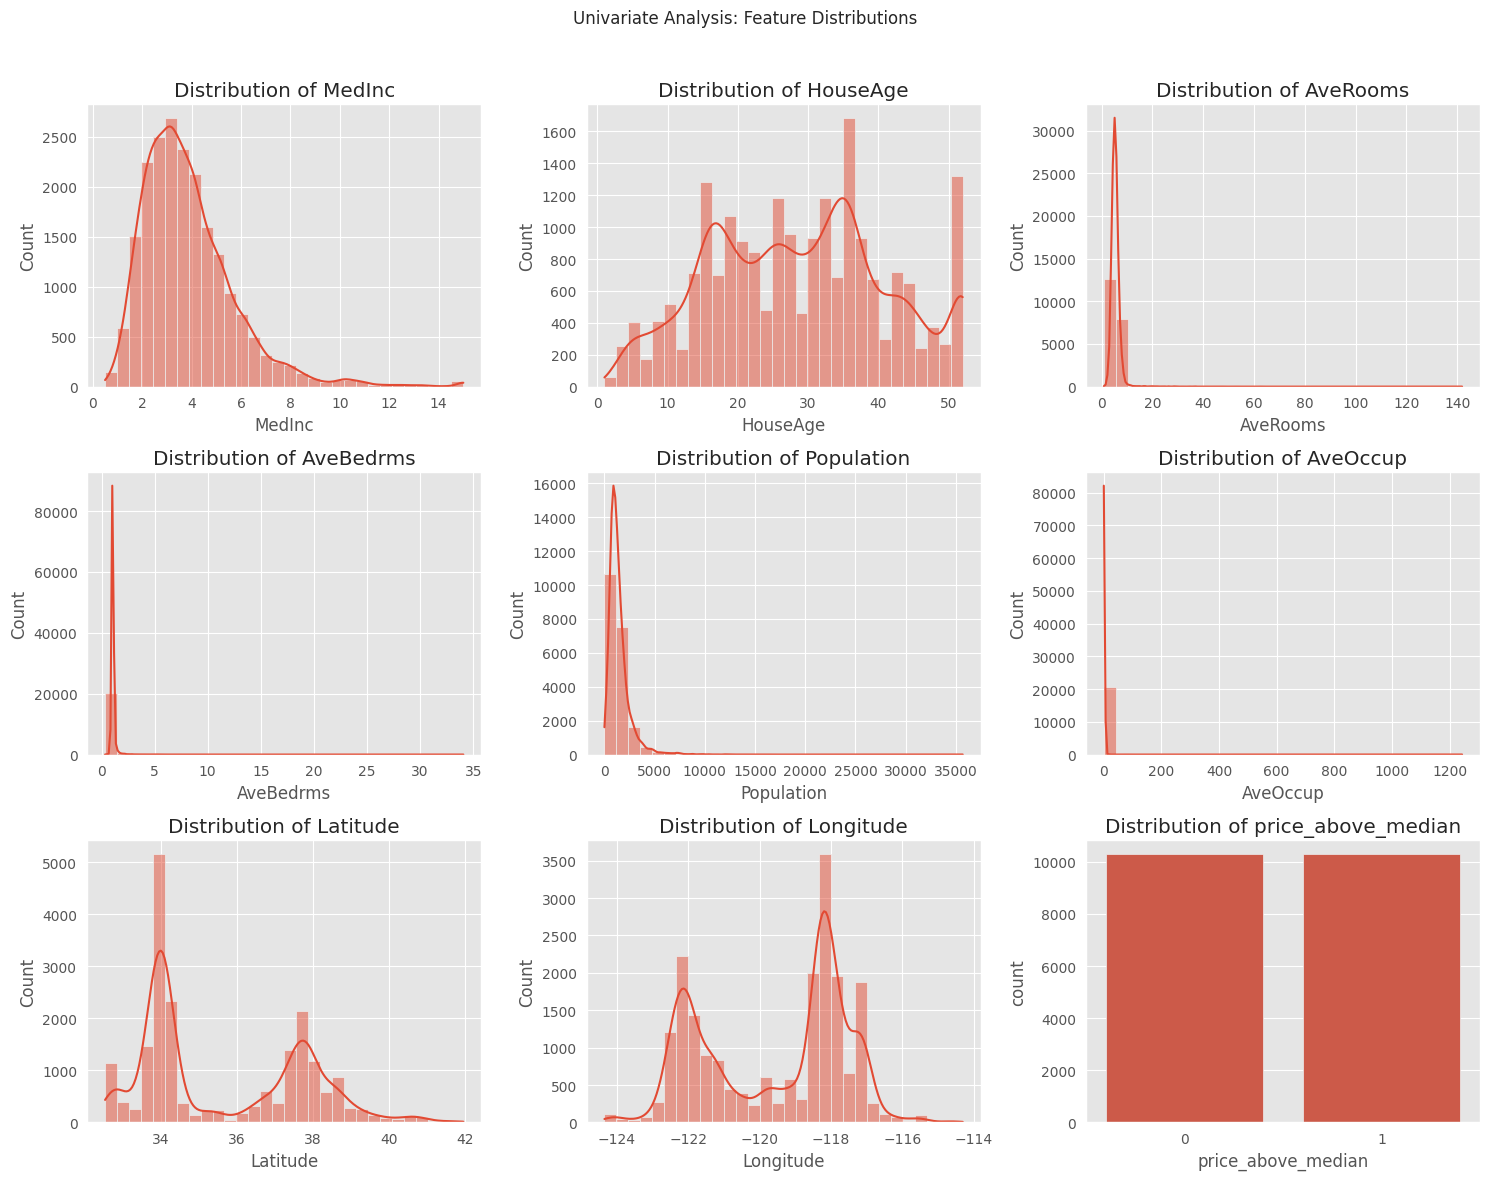

In [ ]:
# univariate analysis

# used some AI to help me format the plots and fix some bugs with some not showing

# Set plot style
plt.style.use("ggplot")

# Create histograms for numerical features and countplot for categorical target variable
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Univariate Analysis: Feature Distributions")

# Variable list including target variable
features = df.columns
axes = axes.ravel()

for i, feature in enumerate(features):
    if df[feature].nunique() == 2:  # If binary, use countplot
        sns.countplot(x=df[feature], ax=axes[i])
    else:
        sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])

    axes[i].set_title(f"Distribution of {feature}")

# display plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###Univariate Insights

- Median Income (MedInc): Skewed towards lower values (right, most below 6), with a small number of high-income outliers.
- House Age (HouseAge): More houses are between 25-40 years (peak) old, with fewer newer houses.
- Average Rooms (AveRooms) and Bedrooms (AveBedrms): Long-tailed distributions suggest a few extreme outliers (most below 20 for AveRooms and most below 10 for AveBedrms).
- Population (Population) and Average Occupancy (AveOccup): Highly skewed with extreme values, indicating the presence of blocks with an unusually high population, mostly blocks have fewered than 5000 ppl.
- Latitude and Longitude: Show expected distributions covering California.
- Price Above Median: Balanced binary distrubtion, either 0 or 1.

##Part 2

In [39]:
# splitting dataset into features and target variable
X = df.drop(columns=["price_above_median"])
y = df["price_above_median"]

# splitting data into training and test (80-20 split, stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# used some AI to help with coming up with which models ideas to use for best results

# models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel="rbf", probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
}

# training and evaluation
results = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# show reports
for name, model in models.items():
    print(f"\n{name} Classifier")
    print("Classification Report:\n", classification_report(y_test, model.predict(X_test_scaled)))
    print("Confusion Matrix:\n", confusion_matrices[name])




K-Nearest Neighbors Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2064
           1       0.82      0.83      0.82      2063

    accuracy                           0.82      4127
   macro avg       0.82      0.82      0.82      4127
weighted avg       0.82      0.82      0.82      4127

Confusion Matrix:
 [[1677  387]
 [ 353 1710]]

Decision Tree Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2064
           1       0.83      0.85      0.84      2063

    accuracy                           0.84      4127
   macro avg       0.84      0.84      0.84      4127
weighted avg       0.84      0.84      0.84      4127

Confusion Matrix:
 [[1708  356]
 [ 304 1759]]

Random Forest Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89

In [44]:
# hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# best parames
best_rf_params = grid_search_rf.best_params_
print("\nBest Random Forest Parameters:", best_rf_params)

# train best model
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)
y_pred_best_rf = best_rf.predict(X_test_scaled)

# classification report and confusion matrix for best Random Forest
best_rf_report = classification_report(y_test, y_pred_best_rf)
best_rf_conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# results
print("\nBest Random Forest Classifier (After Hyperparameter Tuning)")
print("Classification Report:\n", best_rf_report)
print("Confusion Matrix:\n", best_rf_conf_matrix)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Classifier (After Hyperparameter Tuning)
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2064
           1       0.88      0.89      0.89      2063

    accuracy                           0.89      4127
   macro avg       0.89      0.89      0.89      4127
weighted avg       0.89      0.89      0.89      4127

Confusion Matrix:
 [[1825  239]
 [ 225 1838]]
